# Tracking objects using different algorithms via the tracking API

In this recipe, you will learn how to use the different tracking algorithms implemented in the OpenCV tracking contrib module. Different tracking algorithms have different properties in terms of accuracy, reliability, and speed. Using the tracking API, you can try to find the one that best suits your needs.

The OpenCV tracking API provides access to many different tracking algorithms, such as **Median Flow**, **Kernelized correlation filters (KCF)**, **Tracking-Learning-Detection (TLD)**, and some others. A tracker can be instantiated via the `cv2.TrackerKCF_create` method (instead of KCF, you can specify any other supported tracking algorithm name). The tracking model must be initialized for the first frame, with the initial object position specified via the method `tracker.init`. After that, each frame must be processed with the method `tracker.update`, which returns the tracking status and current position of the tracked object. 

In [1]:
# Import the module
import time
import imutils

# Import all of the necessary modules
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    #%pylab inline
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis)
        plt.title(name)
        if cmap =='gray':
            plt.imshow(img,cmap='gray' )
        else:
            plt.imshow(img )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S04\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s04\env

d:\html_doc\program\opencv\packt\s04\env\lib\site-packages
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


# [OpenCV Object Tracking](https://www.pyimagesearch.com/2018/07/30/opencv-object-tracking/)

You might be surprised to know that OpenCV includes eight (yes, eight!) separate object tracking implementations that you can use in your own computer vision applications.

I’ve included a brief highlight of each object tracker below:

1) __BOOSTING Tracker__: Based on the same algorithm used to power the machine learning behind Haar cascades (AdaBoost), but like Haar cascades, is over a decade old. This tracker is slow and doesn’t work very well. Interesting only for legacy reasons and comparing other algorithms. (minimum OpenCV 3.0.0)

2) __MIL Tracker__: Better accuracy than BOOSTING tracker but does a poor job of reporting failure. (minimum OpenCV 3.0.0)

3) __KCF Tracker__: Kernelized Correlation Filters. Faster than BOOSTING and MIL. Similar to MIL and KCF, does not handle full occlusion well. (minimum OpenCV 3.1.0)

4) __CSRT Tracker__: Discriminative Correlation Filter (with Channel and Spatial Reliability). Tends to be more accurate than KCF but slightly slower. (minimum OpenCV 3.4.2)

5) __MedianFlow Tracker__: Does a nice job reporting failures; however, if there is too large of a jump in motion, such as fast moving objects, or objects that change quickly in their appearance, the model will fail. (minimum OpenCV 3.0.0)

6) __TLD Tracker__: I’m not sure if there is a problem with the OpenCV implementation of the TLD tracker or the actual algorithm itself, but the TLD tracker was incredibly prone to false-positives. I do not recommend using this OpenCV object tracker. (minimum OpenCV 3.0.0)

7) __MOSSE Tracker__: Very, very fast. Not as accurate as CSRT or KCF but a good choice if you need pure speed. (minimum OpenCV 3.4.1)

8) __GOTURN Tracker__: The only deep learning-based object detector included in OpenCV. It requires additional model files to run (will not be covered in this post). My initial experiments showed it was a bit of a pain to use even though it reportedly handles viewing changes well (my initial experiments didn’t confirm this though). I’ll try to cover it in a future post, but in the meantime, take a look at Satya’s writeup. (minimum OpenCV 3.2.0)
    * Notice : GOTURN being a CNN based tracker, uses a caffe model for tracking. The Caffe model and the proto text file must be present in the directory in which the code is present. These files can also be downloaded from the opencv_extra repository, concatenated and extracted before use.
    * Update: GOTURN object tracking algorithm has been ported to OpenCV. We have a separate blog post on it’s implementation [here](https://www.learnopencv.com/goturn-deep-learning-based-object-tracking/)

My personal suggestion is to:

* Use __CSRT__ when you need higher object tracking accuracy and can tolerate slower FPS throughput
* Use __KCF__ when you need faster FPS throughput but can handle slightly lower object tracking accuracy
* Use __MOSSE__ when you need pure speed

12 BOOSTING


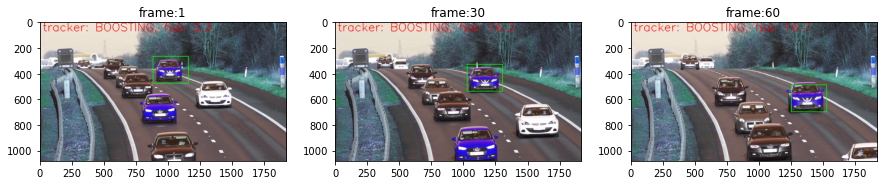

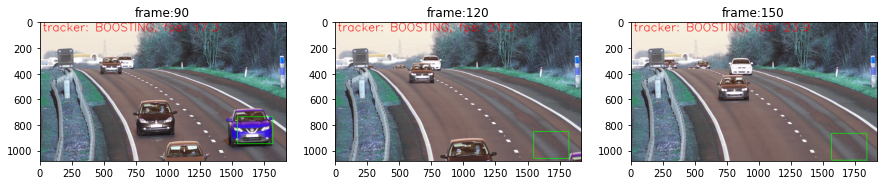

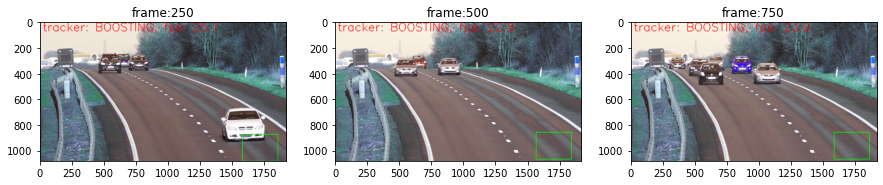

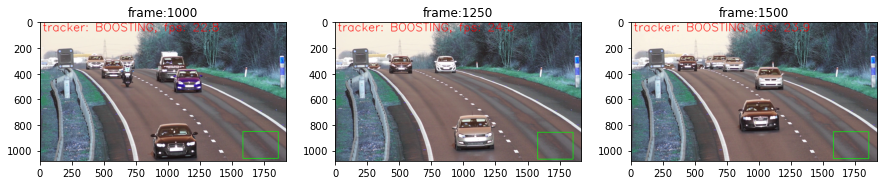

12 MIL


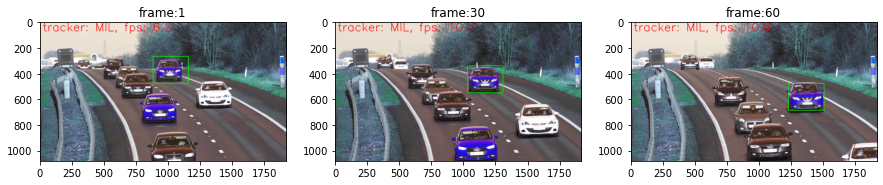

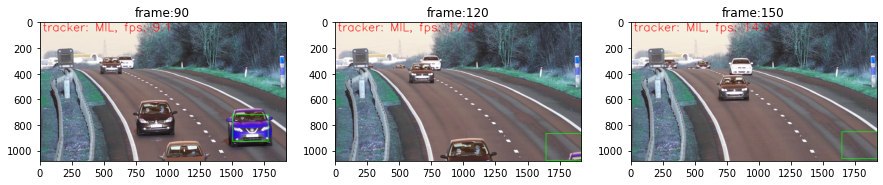

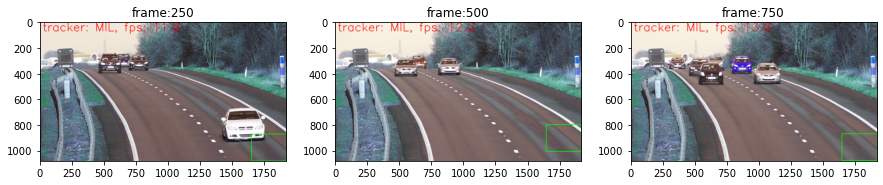

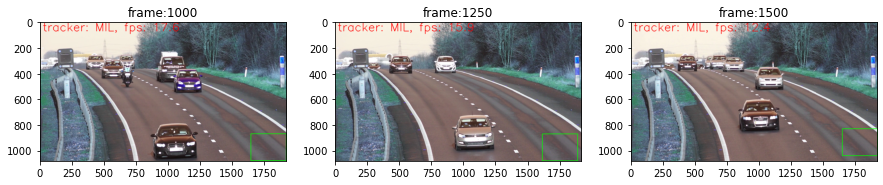

12 KCF


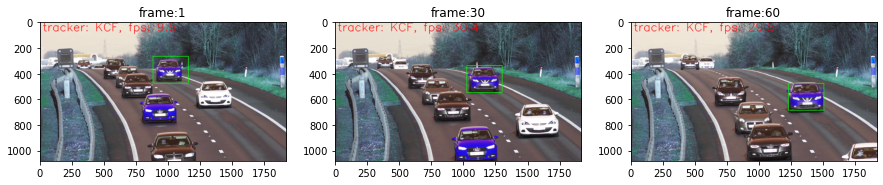

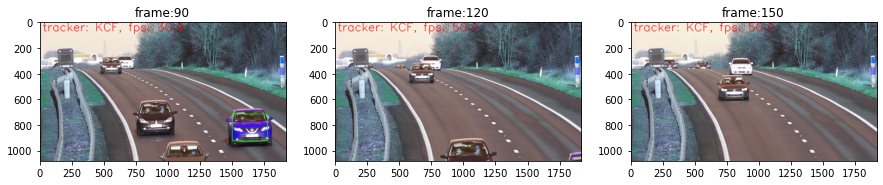

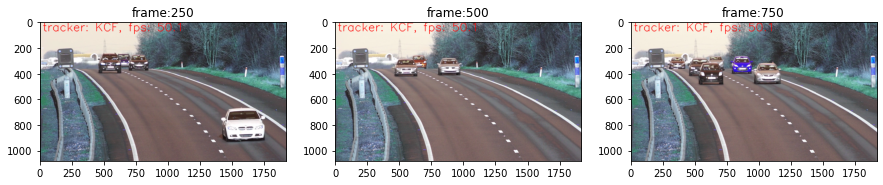

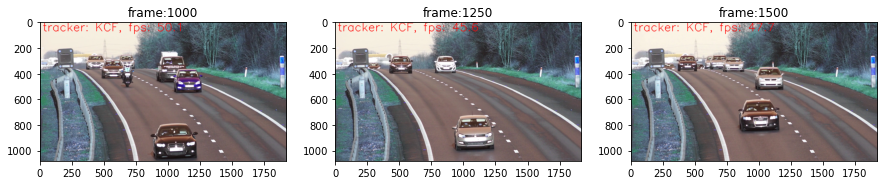

12 CSRT


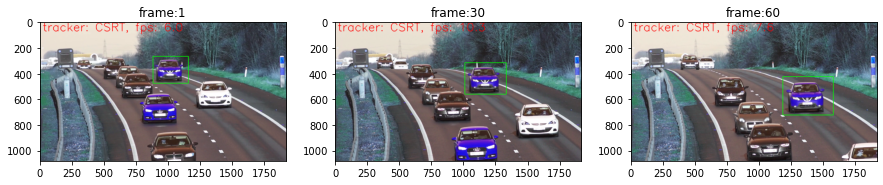

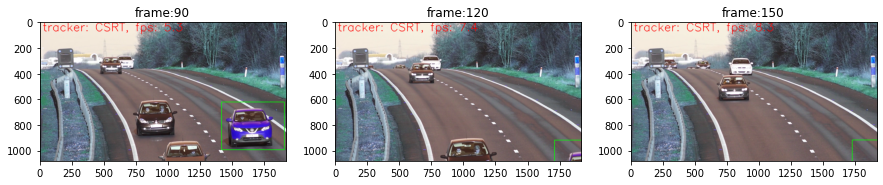

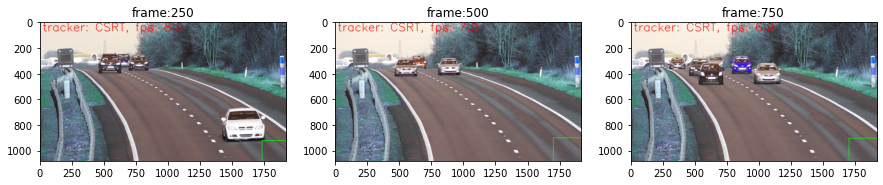

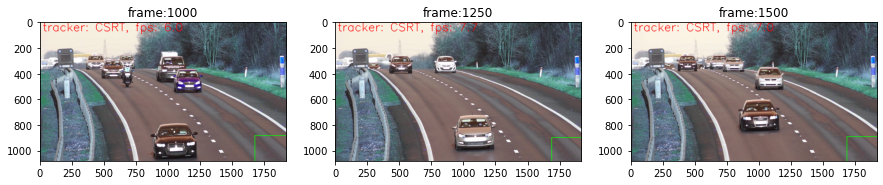

12 MedianFlow


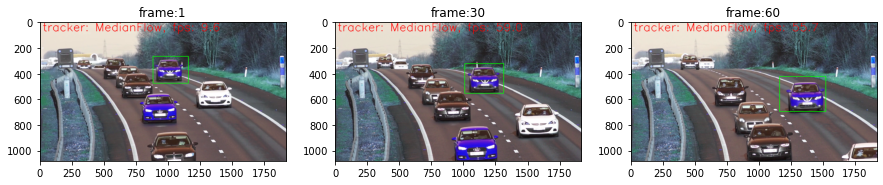

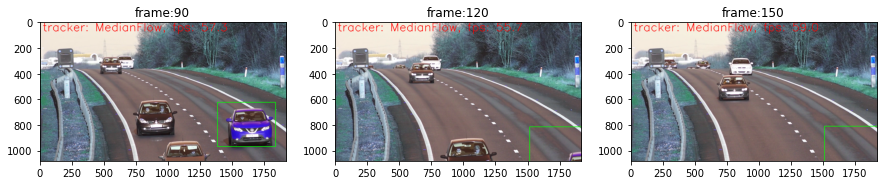

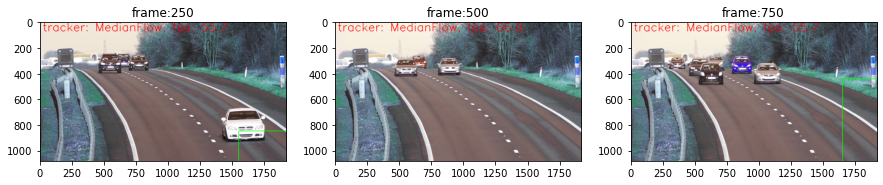

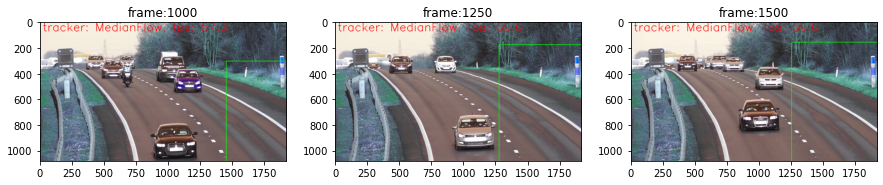

12 TLD


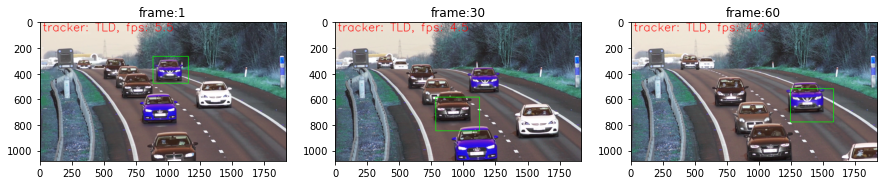

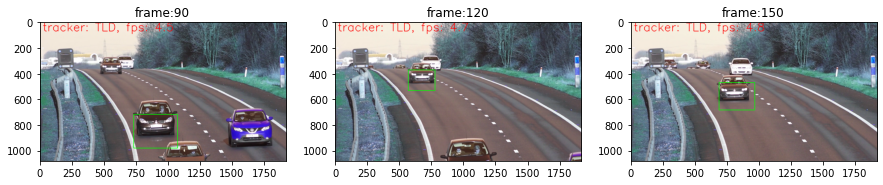

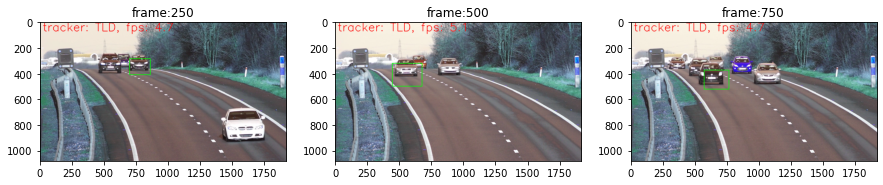

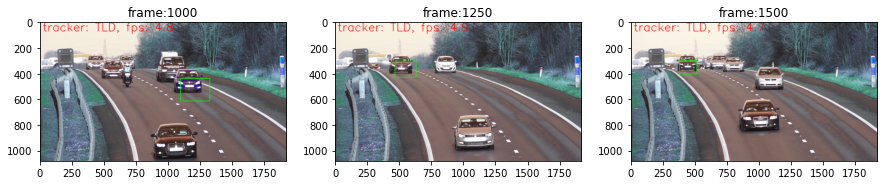

12 MOSSE


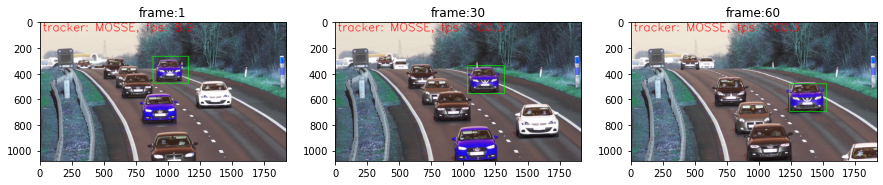

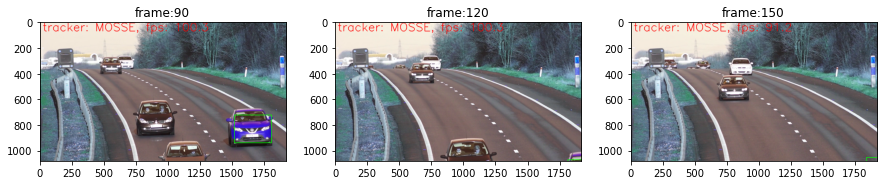

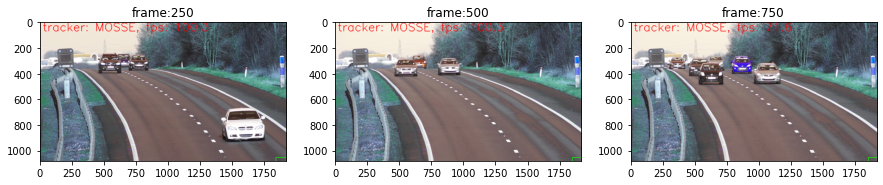

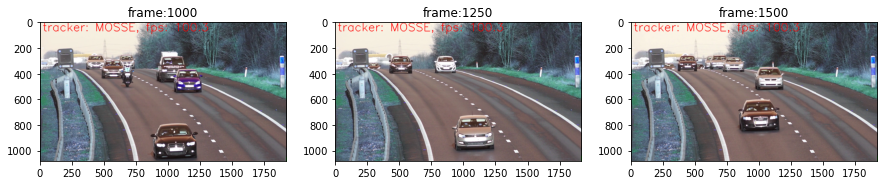

In [2]:
# Create the main window and loop over the different trackers
cv2.namedWindow('frame')

for name, tracker in [("BOOSTING", cv2.TrackerBoosting_create)
                      ,('MIL', cv2.TrackerMIL_create)
                      ,('KCF', cv2.TrackerKCF_create)
                      ,("CSRT", cv2.TrackerCSRT_create)
                      ,("MedianFlow", cv2.TrackerMedianFlow_create)
                      ,('TLD', cv2.TrackerTLD_create)
                      ,("MOSSE", cv2.TrackerMOSSE_create)
                      #,("GOTURN", cv2.TrackerGOTURN_create)
                     ]:
    tracker = tracker()
    initialized = False

    image_frames =[]

    # Open the test video file and select an object
    video = cv2.VideoCapture('../data/traffic.mp4')
    boundingBox = (878, 266, 1153-878, 475-266)

    # Track until the video ends or ESC is pressed, 
    # and visualize the current tracked object
    i = 0
    while True:
        i += 1
        t0 = time.time()
        ok, frame = video.read()
        if not ok: 
            break
        if initialized:
            status_tracker, boundingBox = tracker.update(frame)
        else:
            cv2.imwrite('/tmp/frame.png', frame)
            status_tracker = tracker.init(frame, boundingBox)
            initialized = True

        fps = 1 / (time.time() - t0)
        cv2.putText(frame, 'tracker: {}, fps: {:.1f}'.format(name, fps),
                    (20, 70), cv2.FONT_HERSHEY_SIMPLEX,  3, (255, 0, 0), 4)   
        # нарисовать рамку
        if status_tracker:
            boundingBox = tuple(map(int, boundingBox))
            cv2.rectangle(frame, (boundingBox[0], boundingBox[1]),
                          (boundingBox[0]+boundingBox[2], boundingBox[1]+boundingBox[3]),(0, 255, 0), 3)
            
        cv2.imshow('frame', imutils.resize(frame, width=1000))
        if i == 50:
            cv2.imwrite('frame{}.png'.format(name), frame)
        if cv2.waitKey(3) == 27:
            break
        if i <160:
            if i ==1:
                image_frames.append(["frame:{}".format(i),frame])
            if i % 30 == 0:
                image_frames.append(["frame:{}".format(i),frame])
        else:
            if i % 250 == 0:
                image_frames.append(["frame:{}".format(i),frame])
    
    print(len(image_frames), name)
    k =3
    for jki in range(0,len(image_frames),k):
        plt_view_image(plt,image_frames[jki:jki+k], figsize=(15,8), axis='on', cmap='gray')
            
cv2.destroyAllWindows()